# 6.4 Overfitting

training data에 overfitting -> other data에 제대로 대응하지 못 함.

Machine Learning - 훈련 데이터에 포함되지 않은 새로운 데이터에도 바르게 식별하는 모델 원함.

## 6.4.1 Overfitting

- 매개변수 많고, 표현력이 높은 모델
- 훈련 데이터가 적은 경우

```python
# 훈련 데이터가 적은 경우의 오버피팅 재현 

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:300]
y_train = y_train[:300]

network = MultiLayerNet(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201

train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(networks.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_Acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
```

## 6.4.2 Weight Decay

Overfitting 억제용으로 많이 이용해옴 

- 큰 가중치 -> 큰 패널티
    - 오버피팅의 원인 중 큰 것: 가중치 매개변수의 값이 커서 발생하는 경우 多
    
- 간단 구현 가능, 어느 정도 지나친 학습 억제 가능
    - but 신경망 모델 복잡 -> 가중치 감소만으로는 대응하기 어려워짐

## 6.4.3 Dropout

- 뉴런을 임의로 삭제하면서 학습하는 방법
- 훈련 시 은닉층 뉴런 무작위 삭제
    - 시험 시 모든 뉴런에 신호 전달
    - 시험 시 뉴런의 출력 * 훈련 때 삭제 안 한 비율 곱하여 출력

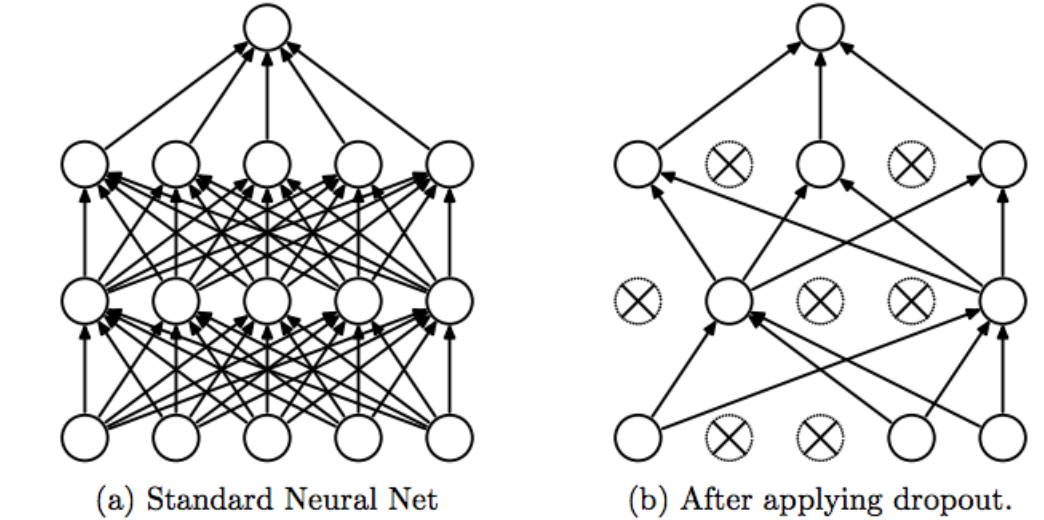

In [1]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout*self.mask

### Key Point about Dropout

- forward 할 때마다 self.mask에 삭제할 뉴런을 False로 표시
    - self.mask
        - x와 형상 같은 배열 무작위 생성
        - 그 값이 dropout_ratio보다 큰 원소만 True로 설정
    - 순전파 신호 통과 뉴런 -> 역전파 때도 신호 그대로 통과
    - 순전파 신호 통과 X 뉴런 -> 역전파 때도 신호 차단

Mnist + ReLU + Dropout -> train-test data 사이의 정확도 차이 줄었음 / 훈련 데이터의 정확도가 100%에 도달하지 않음

**Dropout 이용:** 표현력 향상, 오버피팅 억제 가능

like *Ensemble* at Machine Learning
- 개별적으로 학습시킨 여러 모델 출력 평균 내어 추론
- 비슷한 구조 네트워크 5개 준비 -> 각자 학습 -> 5개 출력 평균 내어 답함
- 신경망 정확도 몇% 개선된다는 것 실험적으로 알려져 있음

- dropout: 뉴런 무작위 삭제 + 추론 시 출력에 삭제 비율 곱함
- ensemble: 매번 다른 모델을 학습시킴 + 여러 모델의 평균을 냄
    - 즉, dropout은 ensemble과 같은 효과를 하나의 nw으로 구현했다고 생각할 수 있음